   user_id  recipe_id  rating
0        1        101       5
1        1        102       4
2        2        101       4
3        2        103       5
4        3        102       3


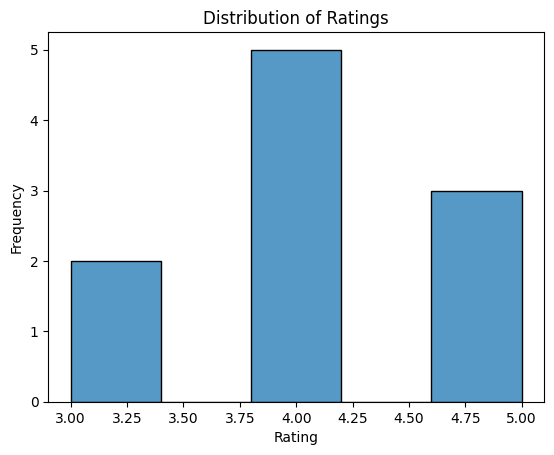

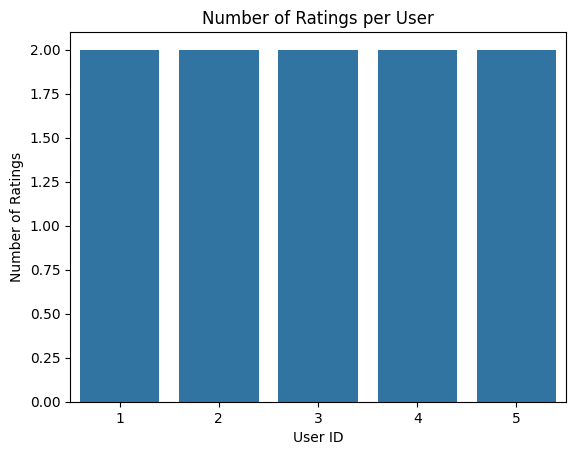

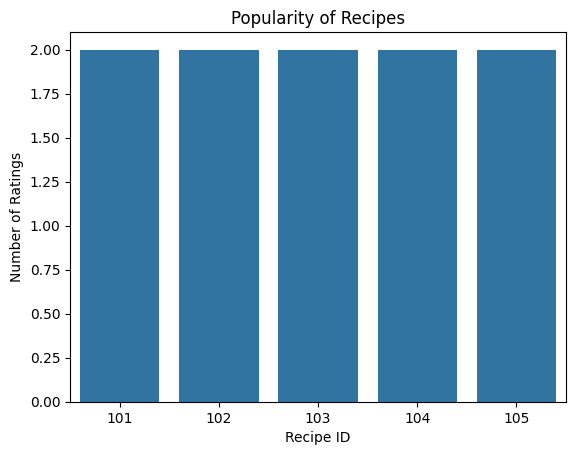

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load example data (real-world or synthetic)
# Assume a dataset with user interactions, including user_id, recipe_id, and rating
data = {
    'user_id': [1, 1, 2, 2, 3, 3, 4, 4, 5, 5],
    'recipe_id': [101, 102, 101, 103, 102, 104, 103, 105, 104, 105],
    'rating': [5, 4, 4, 5, 3, 4, 5, 4, 3, 4]
}
ratings_df = pd.DataFrame(data)

# Simple EDA to understand the dataset
# Check the structure of the data
print(ratings_df.head())

# Visualize the distribution of ratings
sns.histplot(ratings_df['rating'], bins=5)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Visualize the number of ratings per user
user_ratings_count = ratings_df.groupby('user_id').count()
sns.barplot(x=user_ratings_count.index, y=user_ratings_count['rating'])
plt.title('Number of Ratings per User')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.show()

# Visualize the popularity of recipes
recipe_ratings_count = ratings_df.groupby('recipe_id').count()
sns.barplot(x=recipe_ratings_count.index, y=recipe_ratings_count['rating'])
plt.title('Popularity of Recipes')
plt.xlabel('Recipe ID')
plt.ylabel('Number of Ratings')
plt.show()


In [9]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

# Sample data with more users and recipes
data = {
    'user_id': [1, 1, 2, 2, 3, 3, 4, 4, 5, 5],
    'recipe_id': [101, 102, 101, 103, 102, 104, 103, 105, 104, 105],
    'rating': [5, 4, 4, 5, 3, 4, 5, 4, 3, 4]
}
ratings_df = pd.DataFrame(data)

# Create a user-recipe interaction matrix
user_recipe_matrix = pd.pivot_table(
    data=ratings_df,
    index='user_id',
    columns='recipe_id',
    values='rating',
    fill_value=0
)

# Check the shape of the user-recipe matrix
print("Shape of user_recipe_matrix:", user_recipe_matrix.shape)

# Apply matrix factorization using SVD
svd = TruncatedSVD(n_components=5)  # Increase n_components to match with more data
user_factors = svd.fit_transform(user_recipe_matrix)
recipe_factors = svd.components_.T  # Transpose to align dimensions

# Check the shape of recipe_factors after transpose
print("Shape of recipe_factors:", recipe_factors.shape)

# Compute cosine similarity between recipes
recipe_similarity = cosine_similarity(recipe_factors)

# Function to recommend recipes based on user interaction
def recommend_recipes(user_id, n_recommendations=3):
    # Get the user factors for the given user ID
    user_vector = user_factors[user_id - 1]  # Align with user ID
    # Compute the similarity scores
    similarity_scores = recipe_similarity.dot(user_vector)
    # Get the top n recommendations
    recommended_recipes = similarity_scores.argsort()[-n_recommendations:][::-1]  # Reverse to get descending order
    return recommended_recipes

# Example: Get top 3 recommendations for user 1
recommended = recommend_recipes(1, 3)
print("Top 3 recommended recipes for User 1:", recommended)


Shape of user_recipe_matrix: (5, 5)
Shape of recipe_factors: (5, 5)
Top 3 recommended recipes for User 1: [1 0 4]
